In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split

class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iterations=500, add_interactions=False, convergence_threshold=1e-4):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.add_interactions_flag = add_interactions
        self.convergence_threshold = convergence_threshold
        self.weights = None

    @staticmethod
    def generate_interactions(X):
        n_features = X.shape[1]
        interactions = [(X[:, i] * X[:, j]).reshape(-1, 1) for i in range(n_features) for j in range(i+1, n_features)]
        return np.hstack([X] + interactions)

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def compute_gradient(X, y, weights):
        predictions = LogisticRegressionSGD.sigmoid(np.dot(X, weights))
        errors = predictions - y
        gradient = np.dot(X.T, errors) / X.shape[0]  # Normalize gradient by number of samples
        return gradient

    def fit(self, X, y):
        if self.add_interactions_flag:
            X = self.generate_interactions(X)
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
        self.weights = np.random.rand(X.shape[1])
        weights_old = np.copy(self.weights)  # Initialize old weights
        log_likelihoods = []  # Initialize log likelihoods list

        for iteration in range(self.n_iterations):
            gradient = self.compute_gradient(X, y, self.weights)
            self.weights -= self.learning_rate * gradient

            # Calculate the norm of the weight difference (stopping rule)
            diff = weights_old - self.weights
            diff_norm = np.linalg.norm(diff)
            if diff_norm < self.convergence_threshold:
                print(f"Converged at iteration {iteration + 1} due to small weight change.")
                break
            weights_old = np.copy(self.weights)

            # Compute log likelihood
            predictions = self.sigmoid(np.dot(X, self.weights))
            log_likelihood = np.sum(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))
            log_likelihoods.append(log_likelihood)

        return log_likelihoods  # Return the log likelihoods list


    def predict_proba(self, X):
        if self.add_interactions_flag:
            X = self.generate_interactions(X)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(np.dot(X, self.weights))

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)


In [47]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, weights=[0.5, 0.5], flip_y=0, random_state=42)

In [48]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    log_likelihoods_without_interactions = model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=True)
    log_likelihoods_with_interactions = model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

# 2. For all algorithms as performance measure use Balanced Accuracy.

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

Average balanced accuracy without interactions: 0.859335140649741
Average balanced accuracy with interactions: 0.863690928219534


In [49]:
log_likelihoods_without_interactions

[-414.9768688901701,
 -414.07752650442364,
 -413.1862092864492,
 -412.30281285071817,
 -411.42723422444044,
 -410.55937183394417,
 -409.69912549092726,
 -408.8463963785912,
 -408.0010870376706,
 -407.16310135237234,
 -406.33234453623436,
 -405.508723117917,
 -404.69214492693686,
 -403.8825190793556,
 -403.0797559634311,
 -402.283767225244,
 -401.494465754306,
 -400.7117656691614,
 -399.9355823029889,
 -399.1658321892121,
 -398.4024330471274,
 -397.6453037675559,
 -396.8943643985271,
 -396.1495361310003,
 -395.4107412846313,
 -394.67790329359025,
 -393.9509466924354,
 -393.2297971020506,
 -392.51438121564877,
 -391.8046267848498,
 -391.1004626058341,
 -390.40181850557946,
 -389.70862532818273,
 -389.02081492127195,
 -388.3383201225123,
 -387.6610747462086,
 -386.98901357000864,
 -386.3220723217099,
 -385.66018766617236,
 -385.00329719234,
 -384.3513394003742,
 -383.70425368890017,
 -383.0619803423693,
 -382.42446051853904,
 -381.791636236072,
 -381.16345036225607,
 -380.5398466008466,
 

In [50]:
log_likelihoods_with_interactions

[-483.94847408314797,
 -480.0117499655251,
 -476.168016306581,
 -472.41532027705256,
 -468.75170508484973,
 -465.17521374713033,
 -461.6838926617742,
 -458.27579497092955,
 -454.9489837122712,
 -451.70153475620765,
 -448.53153952949265,
 -445.43710752754725,
 -442.4163686193045,
 -439.46747514958304,
 -436.58860384491925,
 -433.7779575294794,
 -431.033766658182,
 -428.3542906745146,
 -425.7378192007754,
 -423.1826730686215,
 -420.6872051979005,
 -418.2498013317839,
 -415.86888063622985,
 -413.5428961717813,
 -411.2703352456596,
 -409.0497196520414,
 -406.8796058083153,
 -404.75858479499277,
 -402.68528230679965,
 -400.65835852230373,
 -398.67650789922993,
 -396.7384589023858,
 -394.8429736708662,
 -392.98884763092633,
 -391.1749090606167,
 -389.4000186119538,
 -387.66306879607686,
 -385.96298343649966,
 -384.2987170952259,
 -382.6692544761546,
 -381.0736098098597,
 -379.51082622349696,
 -377.9799750992647,
 -376.4801554245346,
 -375.0104931364679,
 -373.5701404636513,
 -372.15827526701

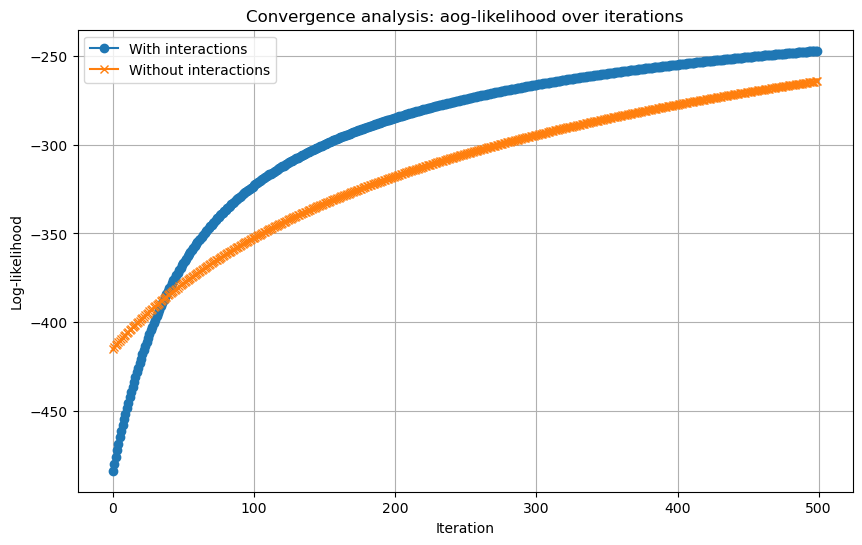

In [51]:
# 3. Convergence analysis:
# Plotting log-likelihood convergence
plt.figure(figsize=(10, 6))
plt.plot(log_likelihoods_with_interactions, label='With interactions', marker='o')
plt.plot(log_likelihoods_without_interactions, label='Without interactions', marker='x')
plt.title('Convergence analysis: aog-likelihood over iterations')
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# 4. Compare the classification performance
models = {
    "Custom SGD Logistic Regression": LogisticRegressionSGD(learning_rate=0.01, n_iterations=1000, add_interactions=False),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [53]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

Custom SGD Logistic Regression: Balanced Accuracy = 0.9045
LDA: Balanced Accuracy = 0.9061
QDA: Balanced Accuracy = 0.9833
Decision Tree: Balanced Accuracy = 0.9227
Random Forest: Balanced Accuracy = 0.9707


In [10]:
# 5. In the case of small datasets, please compare the two versions of the logistic regression: model without interactions and model with interactions.

False


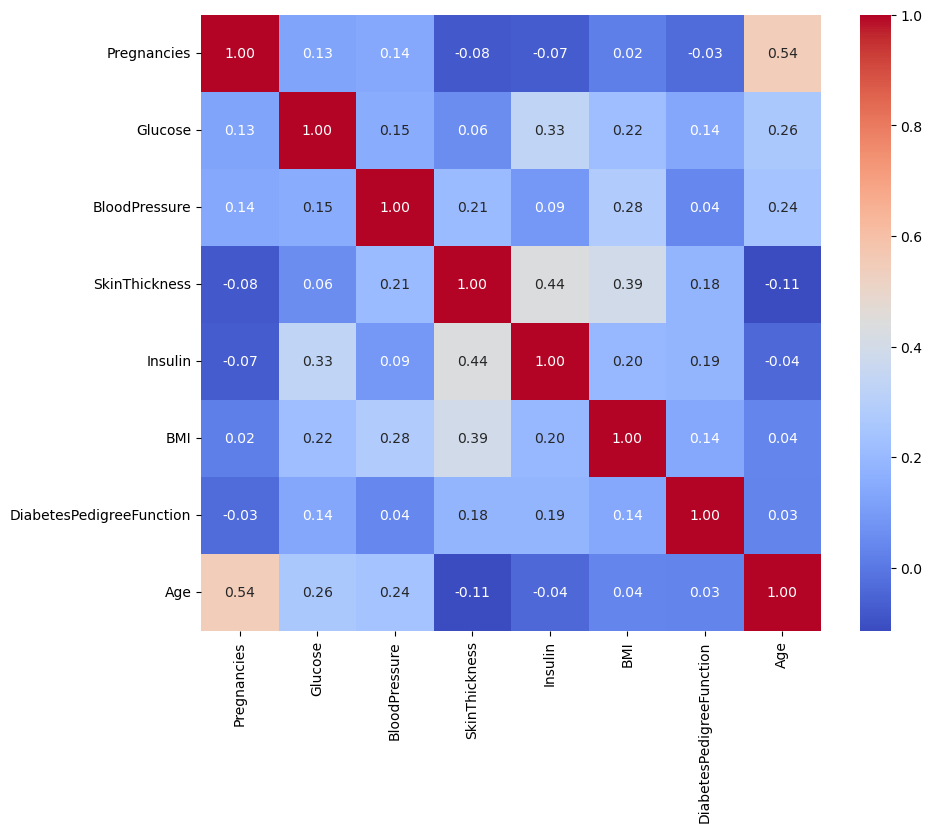

False
          Amount  Age     Income      Debt  CreditScore
0         998.99   56   42524.98   8394.05          655
1         241.39   52   69884.04  28434.06          395
2         836.42   58  126953.62  39121.78          496
3         612.74   19  128650.70  39652.48          612
4         135.55   59  102020.39   7439.81          302
...          ...  ...        ...       ...          ...
1999995  3478.81   20  127482.32   6161.07          796
1999996  2337.90   22   94866.98  21614.64          660
1999997  2142.04   51  137229.33   5654.83          432
1999998  2452.60   45  129794.90  34964.36          317
1999999  4385.23   49   81110.21  44744.80          312

[2000000 rows x 5 columns]


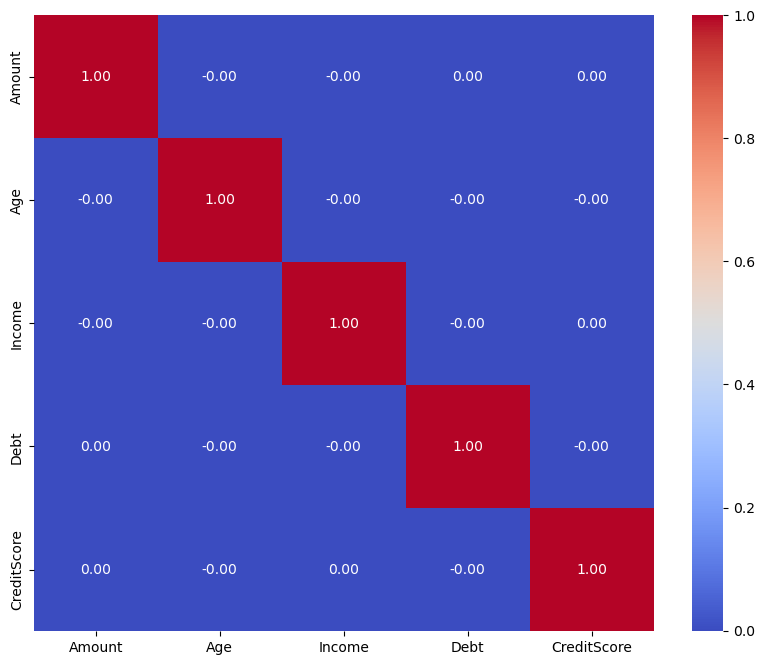

False


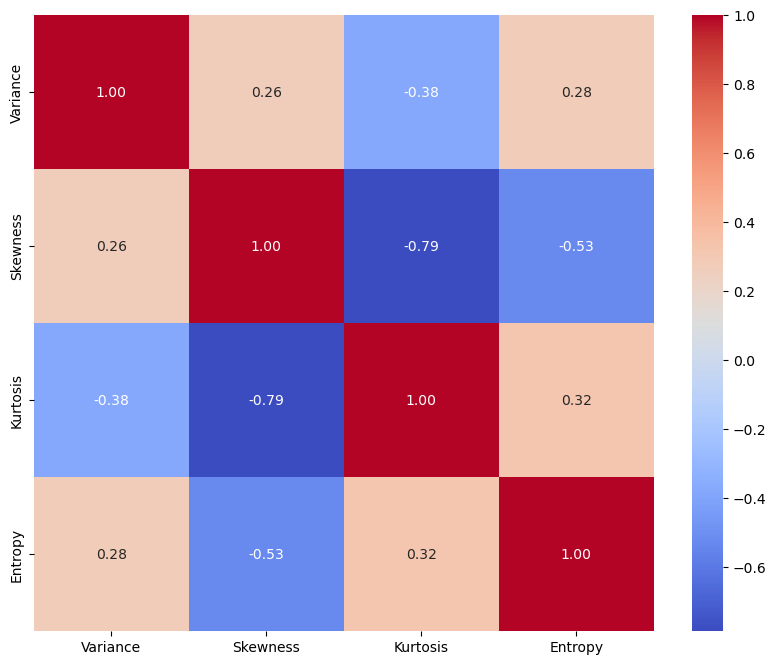

      Principal Component 1  Principal Component 2  Class
0                 -1.472805              -1.163917      0
1                 -1.639441              -1.093812      0
2                  0.513919              -1.324880      0
3                 -2.310952              -0.202514      0
4                  1.193416               0.024654      0
...                     ...                    ...    ...
1367              -0.221995              -0.290458      1
1368               1.909395               0.142149      1
1369               4.049327               2.036023      1
1370               3.019617               1.392140      1
1371               1.170582               0.091031      1

[1372 rows x 3 columns]
Explained variance ratio: [0.54497602 0.32328872]


In [3]:
%run "3_small_datasets.ipynb" # Add your path to 3_small_datasets.ipynb file, e.g. "C:/Project1/3_small_datasets.ipynb"

In [12]:
diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
X_diabets = diabets.drop('Outcome', axis=1)
y_diabets = diabets['Outcome']

In [14]:
X_diabets = X_diabets.to_numpy()

In [15]:
y_diabets = y_diabets.to_numpy()

In [16]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_diabets, y_diabets, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=True)
    model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 257.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 6.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 90.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 190.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 23.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 45.
Average balanced accuracy without interactions: 0.5603946987582574
Average balanced accuracy with interactions: 0.5663030194909129


In [4]:
data_with_class_fraud

,amount,age,income,debt,credit_score,is_fraud
0,998.99,56,42524.98,8394.05,655,0
1,241.39,52,69884.04,28434.06,395,0
2,836.42,58,126953.62,39121.78,496,0
3,612.74,19,128650.70,39652.48,612,0
4,135.55,59,102020.39,7439.81,302,0
...,...,...,...,...,...,...
1999995,3478.81,20,127482.32,6161.07,796,1
1999996,2337.90,22,94866.98,21614.64,660,1
1999997,2142.04,51,137229.33,5654.83,432,1
1999998,2452.60,45,129794.90,34964.36,317,1


In [5]:
X_fraud = data_with_class_fraud.drop('is_fraud', axis=1)
y_fraud = data_with_class_fraud['is_fraud']

In [6]:
X_fraud = X_fraud.to_numpy()

In [7]:
y_fraud = y_fraud.to_numpy()

In [8]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_fraud, y_fraud, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=1, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=1, add_interactions=True)
    model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\T

Average balanced accuracy without interactions: 0.93859606757552
Average balanced accuracy with interactions: 0.9148076085801218


In [9]:
pca_df_banknote

,Principal Component 1,Principal Component 2,Class
0,-1.472805,-1.163917,0
1,-1.639441,-1.093812,0
2,0.513919,-1.324880,0
3,-2.310952,-0.202514,0
4,1.193416,0.024654,0
...,...,...,...
1367,-0.221995,-0.290458,1
1368,1.909395,0.142149,1
1369,4.049327,2.036023,1
1370,3.019617,1.392140,1


In [10]:
X_banknote = pca_df_banknote.drop('Class', axis=1)
y_banknote = pca_df_banknote['Class']
X_banknote = X_banknote.to_numpy()
y_banknote = y_banknote.to_numpy()

In [11]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_banknote, y_banknote, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=1, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=1, add_interactions=True)
    model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

Average balanced accuracy without interactions: 0.7697378895638669
Average balanced accuracy with interactions: 0.79748406905177


In [34]:
balanced_accuracies_without_interactions

[0.8929824561403509,
 0.8722850565508957,
 0.859375,
 0.8870192307692308,
 0.8774436090225564]